<a href="https://colab.research.google.com/github/zahraniayudyaa/midterm-machine-learning/blob/main/Zahrani_ML_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install gdown if not already installed
!pip install -U -q gdown

In [ ]:
# Replace 'your_folder_id' with the actual folder ID
folder_id = '1FsQtOI_QES15zZLmEw099MGAR5-rnsOP'

# Download all files from the specified Google Drive folder
# The `--folder` flag indicates that the ID belongs to a folder
# The `--id` flag is for the folder ID
# The `--output` flag (optional) can specify a directory to save files,
# but by default, it will download to the current directory.
print(f"Downloading files from folder ID: {folder_id}")
!gdown --folder --id {folder_id}

print("Download complete. You can list the files in the current directory to see the downloaded content.")

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Retrieving folder contents
Processing file 1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q clusteringmidterm.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q
To: /content/Machine Learning/clusteringmidterm.csv
100% 1.01M/1.01M [00:00<00:00, 89.4MB/s]
Download completed
Download complete. You can list the files in the current directory to see the downloaded content.


In [ ]:
import pandas as pd

df = pd.read_csv('Machine Learning/clusteringmidterm.csv')
display(df.head())

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# ==================== IMPORT LIBRARIES ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# Clustering algorithms
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Evaluation metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Visualization
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [ ]:
# ==================== 1. LOAD AND EXPLORE DATA ====================
print("=" * 60)
print("1. LOADING AND EXPLORING DATA")
print("=" * 60)

# Load dataset
# df = pd.read_csv('clusteringmtd@rm.csv')  # Ganti dengan path dataset Anda

# Initial exploration
print(f"Dataset Shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())
print(f"\nColumn Information:")
print(df.info())
print(f"\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print(f"\nMissing Values per Column:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Values'] > 0])

1. LOADING AND EXPLORING DATA
Dataset Shape: (8950, 18)

First 5 rows:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000   

In [ ]:
# ==================== 2. DATA CLEANING ====================
print("\n" + "=" * 60)
print("2. DATA CLEANING")
print("=" * 60)

# Create a copy for cleaning
df_clean = df.copy()

# Handle missing values
# For CREDIT_LIMIT and MINIMUM_PAYMENTS, fill with median
if 'CREDIT_LIMIT' in df_clean.columns:
    df_clean['CREDIT_LIMIT'].fillna(df_clean['CREDIT_LIMIT'].median(), inplace=True)
if 'MINIMUM_PAYMENTS' in df_clean.columns:
    df_clean['MINIMUM_PAYMENTS'].fillna(df_clean['MINIMUM_PAYMENTS'].median(), inplace=True)

# Drop CUST_ID for clustering (we'll keep it separately)
cust_ids = df_clean['CUST_ID'] if 'CUST_ID' in df_clean.columns else None
if 'CUST_ID' in df_clean.columns:
    df_clean = df_clean.drop('CUST_ID', axis=1)

print("Missing values after cleaning:")
print(df_clean.isnull().sum().sum())


2. DATA CLEANING
Missing values after cleaning:
0


In [ ]:
# ==================== 3. FEATURE ENGINEERING ====================
print("\n" + "=" * 60)
print("3. FEATURE ENGINEERING")
print("=" * 60)

# Create new features
df_features = df_clean.copy()

# 1. Average purchase per transaction
if all(col in df_features.columns for col in ['PURCHASES', 'PURCHASES_TRX']):
    df_features['AVG_PURCHASE_PER_TRX'] = df_features['PURCHASES'] / (df_features['PURCHASES_TRX'] + 1)

# 2. Credit utilization ratio
if all(col in df_features.columns for col in ['BALANCE', 'CREDIT_LIMIT']):
    df_features['CREDIT_UTILIZATION_RATIO'] = df_features['BALANCE'] / (df_features['CREDIT_LIMIT'] + 1)

# 3. Payment to balance ratio
if all(col in df_features.columns for col in ['PAYMENTS', 'BALANCE']):
    df_features['PAYMENT_TO_BALANCE_RATIO'] = df_features['PAYMENTS'] / (df_features['BALANCE'] + 1)

# 4. Purchase type ratio
if all(col in df_features.columns for col in ['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']):
    df_features['ONEOFF_TO_INSTALLMENT_RATIO'] = df_features['ONEOFF_PURCHASES'] / (df_features['INSTALLMENTS_PURCHASES'] + 1)

# 5. Cash advance usage
if all(col in df_features.columns for col in ['CASH_ADVANCE', 'CREDIT_LIMIT']):
    df_features['CASH_ADVANCE_USAGE'] = df_features['CASH_ADVANCE'] / (df_features['CREDIT_LIMIT'] + 1)

print(f"New features created. Total features: {df_features.shape[1]}")


3. FEATURE ENGINEERING
New features created. Total features: 22



4. OUTLIER DETECTION AND HANDLING


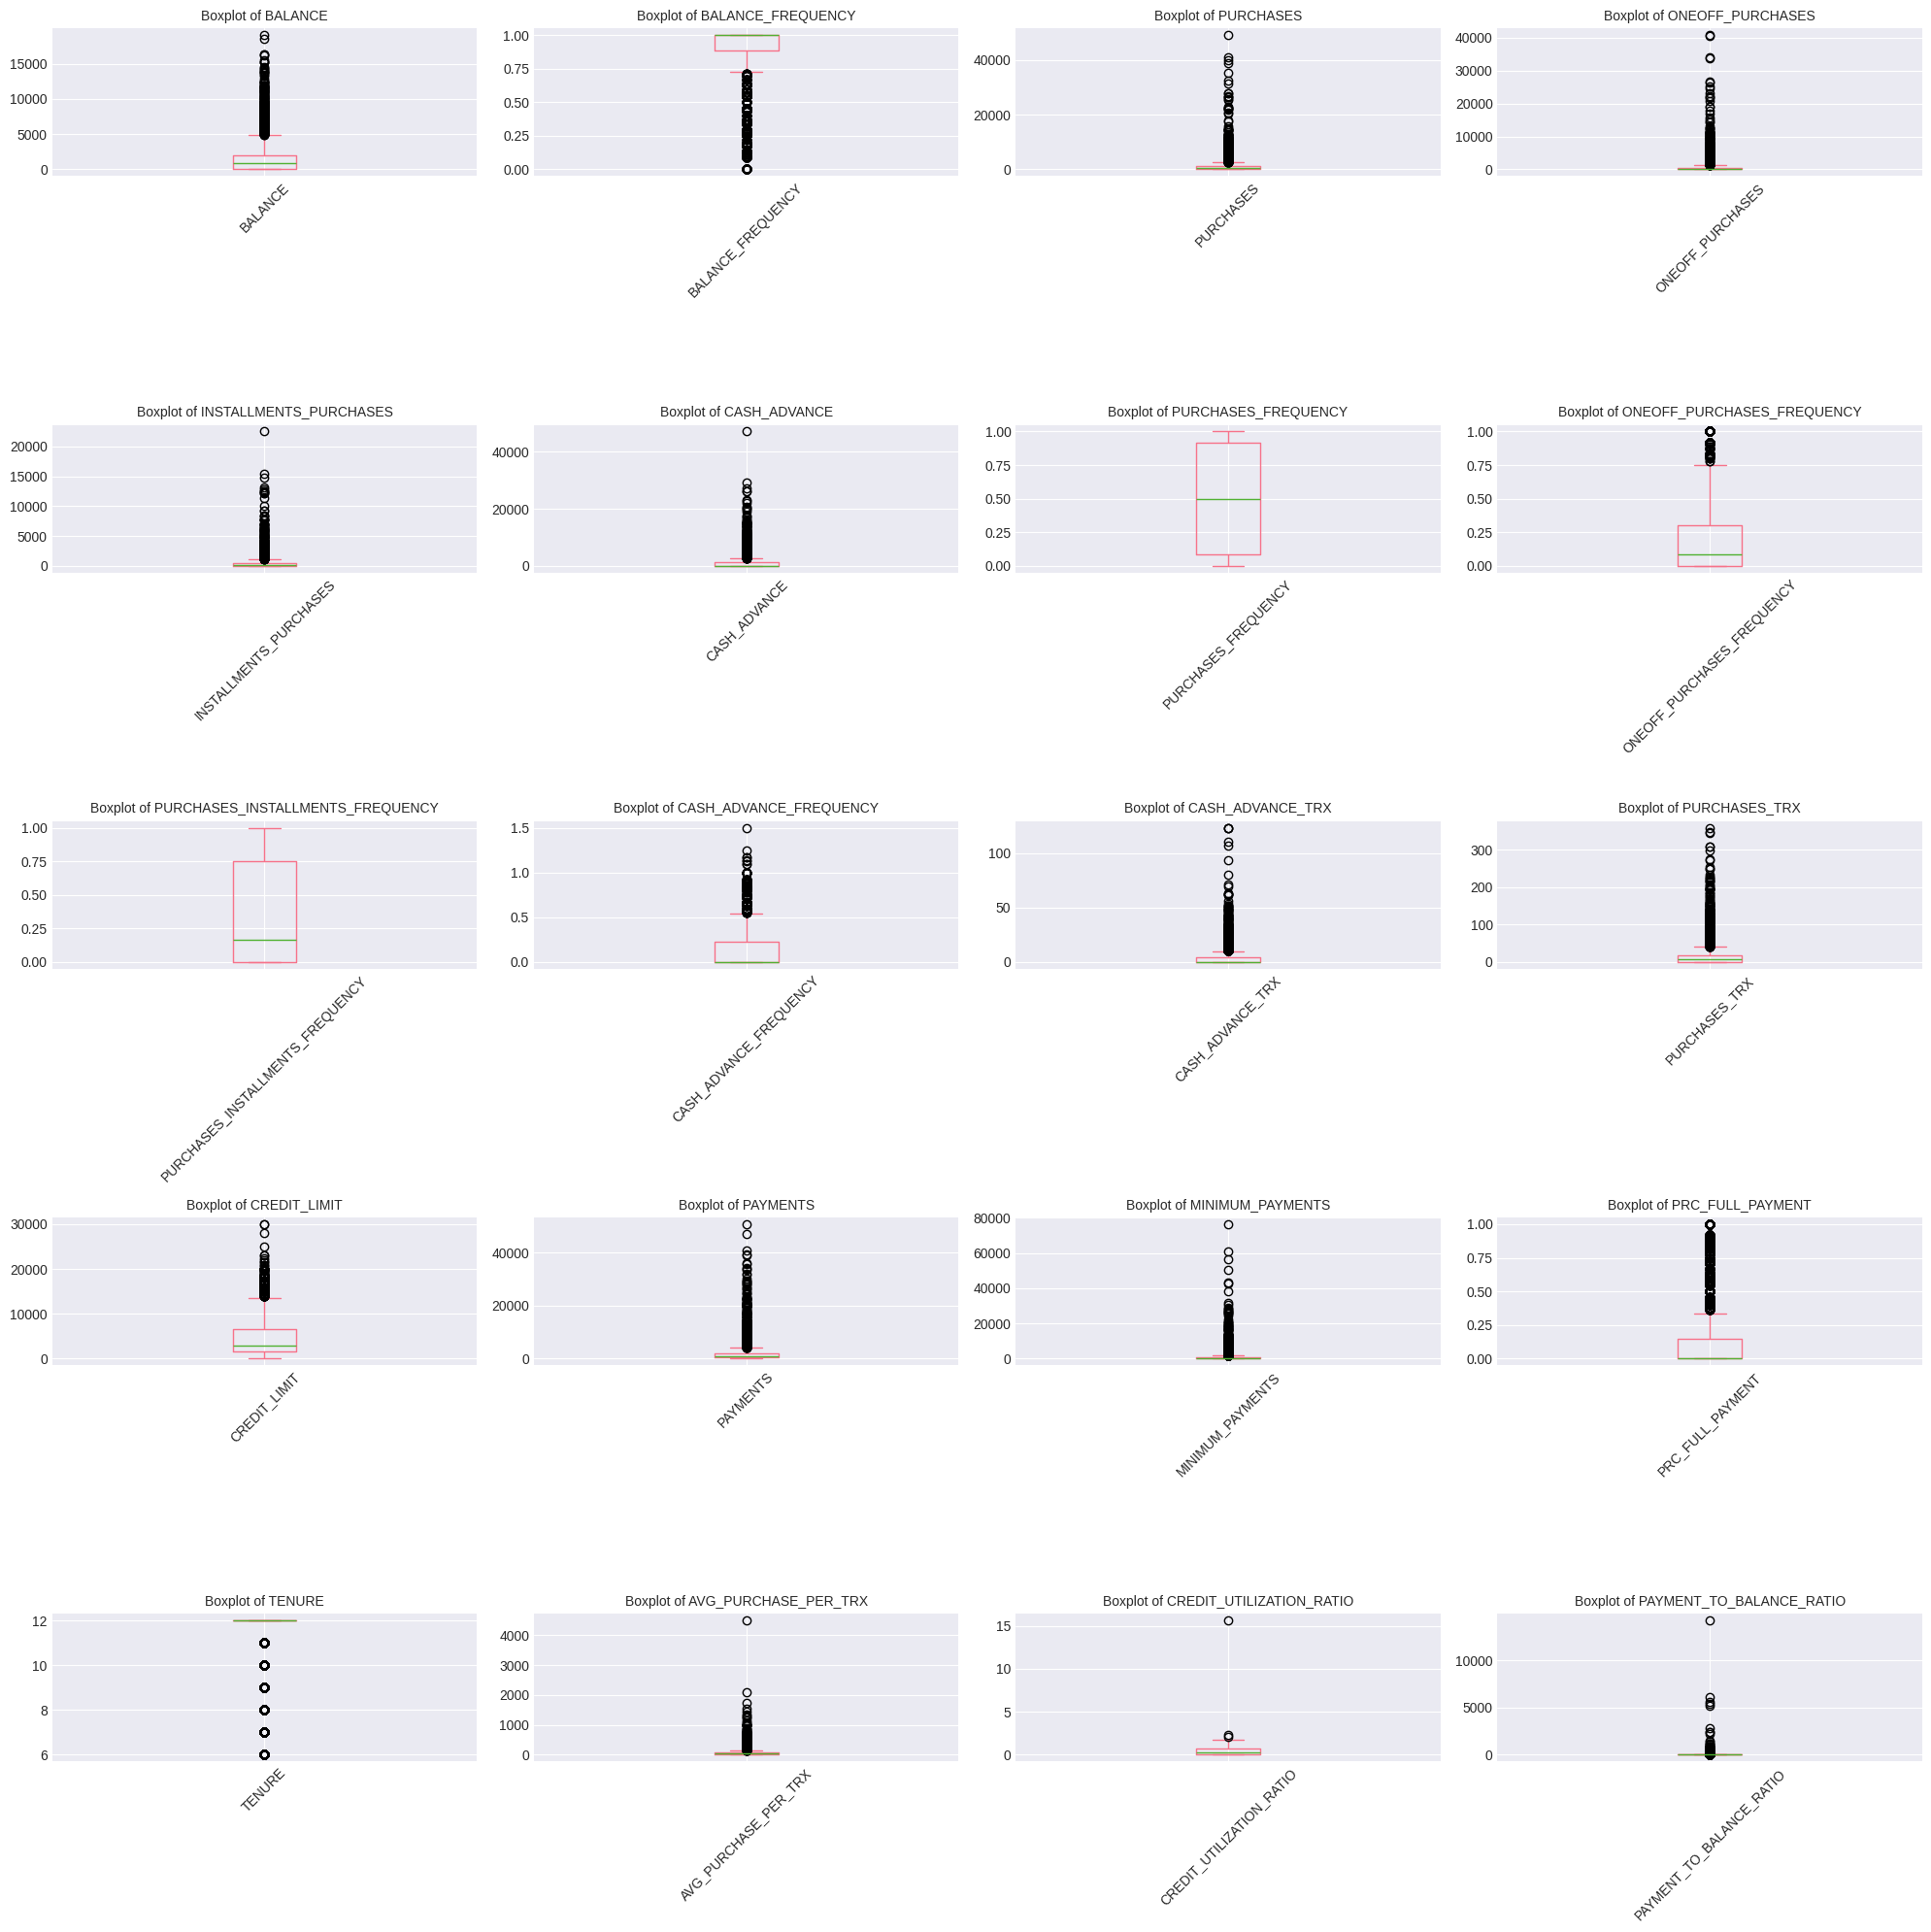

Outliers handled using winsorization (5th-95th percentile)


In [ ]:
# ==================== 4. OUTLIER HANDLING ====================
print("\n" + "=" * 60)
print("4. OUTLIER DETECTION AND HANDLING")
print("=" * 60)

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Select numerical columns for outlier analysis
numeric_cols = df_features.select_dtypes(include=[np.number]).columns.tolist()

# Visualize outliers before handling
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_cols[:20]):
    if i < len(axes):
        df_features[col].plot(kind='box', ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}', fontsize=10)
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('outliers_before.png', dpi=300, bbox_inches='tight')
plt.show()

# Handle outliers using winsorization (capping)
df_no_outliers = df_features.copy()
for col in numeric_cols:
    Q1 = df_features[col].quantile(0.05)  # Using 5th and 95th percentiles
    Q3 = df_features[col].quantile(0.95)
    df_no_outliers[col] = df_no_outliers[col].clip(lower=Q1, upper=Q3)

print("Outliers handled using winsorization (5th-95th percentile)")

In [ ]:
# ==================== 5. DATA SCALING ====================
print("\n" + "=" * 60)
print("5. DATA SCALING")
print("=" * 60)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_no_outliers)
df_scaled = pd.DataFrame(scaled_data, columns=df_no_outliers.columns)

print("Data scaled using StandardScaler")
print(f"Scaled data shape: {df_scaled.shape}")


5. DATA SCALING
Data scaled using StandardScaler
Scaled data shape: (8950, 22)



6. DIMENSIONALITY REDUCTION WITH PCA
Original dimensions: 22
Dimensions after PCA: 13
Explained variance ratio: 0.9509


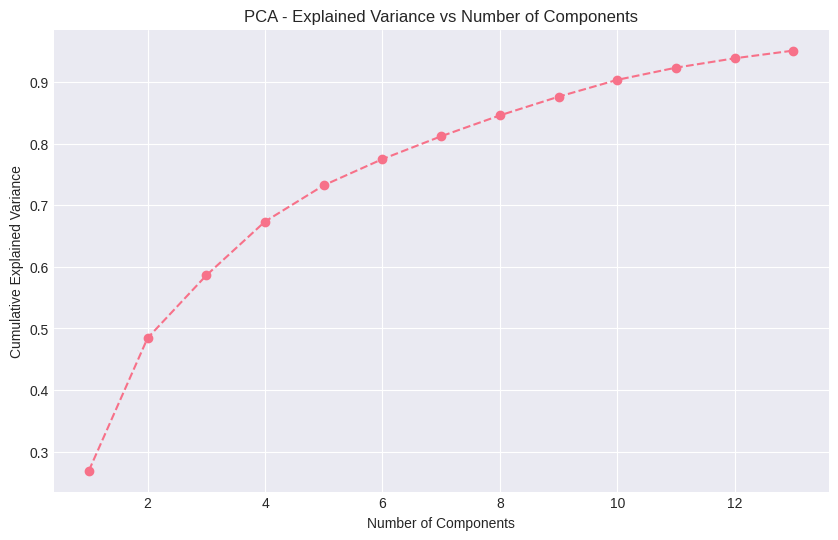

In [ ]:
# ==================== 6. DIMENSIONALITY REDUCTION (PCA) ====================
print("\n" + "=" * 60)
print("6. DIMENSIONALITY REDUCTION WITH PCA")
print("=" * 60)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
pca_data = pca.fit_transform(df_scaled)

print(f"Original dimensions: {df_scaled.shape[1]}")
print(f"Dimensions after PCA: {pca.n_components_}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_.sum():.4f}")

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance vs Number of Components')
plt.grid(True)
plt.savefig('pca_explained_variance.png', dpi=300, bbox_inches='tight')
plt.show()


7. FINDING OPTIMAL NUMBER OF CLUSTERS


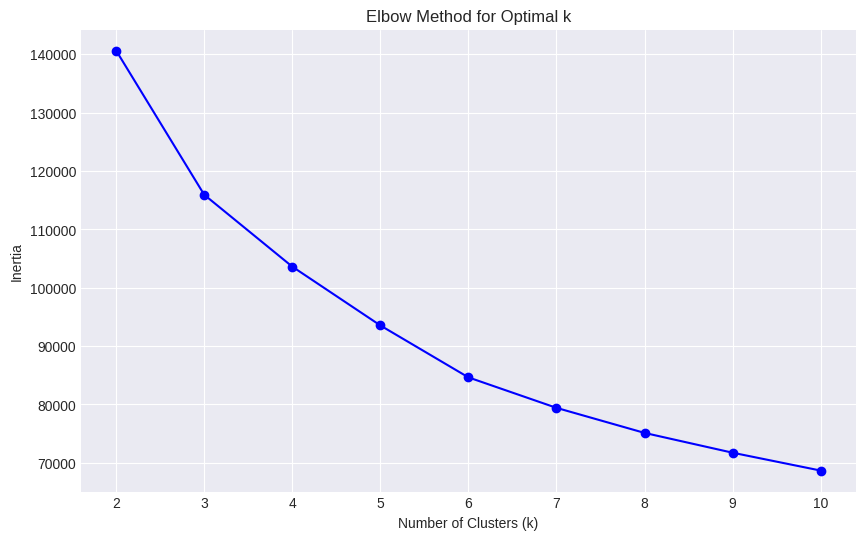

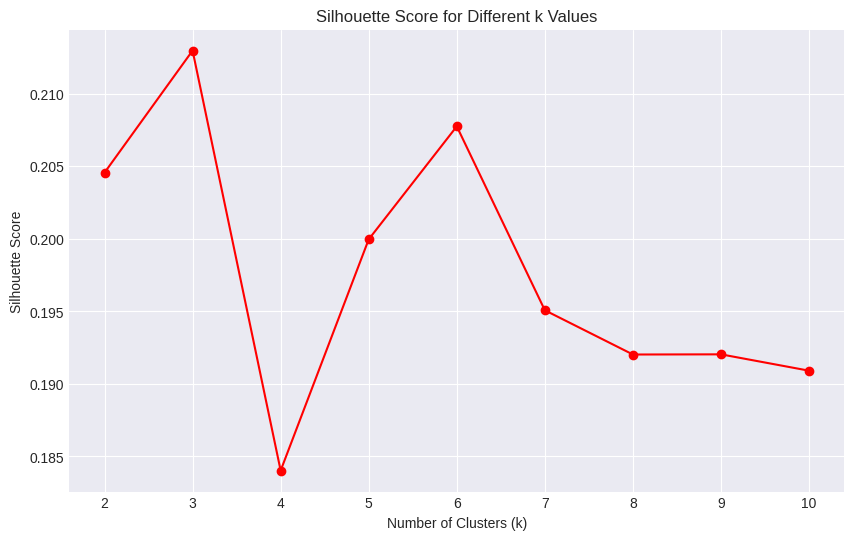

Optimal number of clusters based on silhouette score: 3


In [ ]:
# ==================== 7. DETERMINE OPTIMAL NUMBER OF CLUSTERS ====================
print("\n" + "=" * 60)
print("7. FINDING OPTIMAL NUMBER OF CLUSTERS")
print("=" * 60)

# Use PCA-reduced data for faster computation
if pca.n_components_ > 10:
    data_for_clustering = pca_data[:, :10]  # Use first 10 components
else:
    data_for_clustering = pca_data

# Elbow Method
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_for_clustering)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.savefig('elbow_method.png', dpi=300, bbox_inches='tight')
plt.show()

# Silhouette Score Analysis
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data_for_clustering)
    silhouette_avg = silhouette_score(data_for_clustering, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values')
plt.grid(True)
plt.savefig('silhouette_scores.png', dpi=300, bbox_inches='tight')
plt.show()

# Find optimal k (maximum silhouette score)
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")

In [ ]:
# ==================== 8. APPLY CLUSTERING ALGORITHMS ====================
print("\n" + "=" * 60)
print(f"8. APPLYING CLUSTERING ALGORITHMS (k={optimal_k})")
print("=" * 60)

# Dictionary to store results
clustering_results = {}

# 1. K-Means Clustering
print("\n1. Training K-Means...")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=20)
kmeans_labels = kmeans.fit_predict(data_for_clustering)
clustering_results['KMeans'] = kmeans_labels

# 2. Agglomerative Hierarchical Clustering
print("2. Training Agglomerative Clustering...")
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg_clustering.fit_predict(data_for_clustering)
clustering_results['Agglomerative'] = agg_labels

# 3. Gaussian Mixture Model
print("3. Training Gaussian Mixture Model...")
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(data_for_clustering)
clustering_results['GMM'] = gmm_labels

# 4. DBSCAN (automatic determination of clusters)
print("4. Training DBSCAN...")
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_for_clustering)
clustering_results['DBSCAN'] = dbscan_labels

print("\nClustering completed!")


8. APPLYING CLUSTERING ALGORITHMS (k=3)

1. Training K-Means...
2. Training Agglomerative Clustering...
3. Training Gaussian Mixture Model...
4. Training DBSCAN...

Clustering completed!


In [ ]:
# ==================== 9. EVALUATE CLUSTERING RESULTS ====================
print("\n" + "=" * 60)
print("9. EVALUATING CLUSTERING RESULTS")
print("=" * 60)

# Create evaluation DataFrame
evaluation_df = pd.DataFrame(index=clustering_results.keys(),
                             columns=['Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Score', 'Number of Clusters'])

for algo, labels in clustering_results.items():
    if len(set(labels)) > 1:  # Need at least 2 clusters for evaluation
        evaluation_df.loc[algo, 'Silhouette Score'] = silhouette_score(data_for_clustering, labels)
        evaluation_df.loc[algo, 'Davies-Bouldin Index'] = davies_bouldin_score(data_for_clustering, labels)
        evaluation_df.loc[algo, 'Calinski-Harabasz Score'] = calinski_harabasz_score(data_for_clustering, labels)
        evaluation_df.loc[algo, 'Number of Clusters'] = len(set(labels))
    else:
        evaluation_df.loc[algo, 'Number of Clusters'] = len(set(labels))

print("Clustering Evaluation Metrics:")
print(evaluation_df)

# Find best algorithm based on silhouette score
best_algo = evaluation_df['Silhouette Score'].idxmax()
best_labels = clustering_results[best_algo]
print(f"\nBest clustering algorithm: {best_algo}")


9. EVALUATING CLUSTERING RESULTS
Clustering Evaluation Metrics:
              Silhouette Score Davies-Bouldin Index Calinski-Harabasz Score  \
KMeans                0.212999             1.585234             2391.284432   
Agglomerative         0.156363             1.860032             1661.639543   
GMM                   0.094384             2.302908             1142.743263   
DBSCAN               -0.445062              1.26371               15.878927   

              Number of Clusters  
KMeans                         3  
Agglomerative                  3  
GMM                            3  
DBSCAN                        50  

Best clustering algorithm: KMeans


In [ ]:
# ==================== 10. CLUSTER ANALYSIS AND PROFILING ====================
print("\n" + "=" * 60)
print("10. CLUSTER PROFILING AND ANALYSIS")
print("=" * 60)

# Add cluster labels to original data
df_analysis = df_no_outliers.copy()
df_analysis['Cluster'] = best_labels

# For DBSCAN, handle noise points (label -1)
if best_algo == 'DBSCAN':
    # Replace -1 with last cluster number
    noise_mask = df_analysis['Cluster'] == -1
    if noise_mask.any():
        max_cluster = df_analysis['Cluster'].max()
        df_analysis.loc[noise_mask, 'Cluster'] = max_cluster + 1
    # Renumber clusters sequentially
    unique_clusters = sorted(df_analysis['Cluster'].unique())
    cluster_mapping = {old: new for new, old in enumerate(unique_clusters)}
    df_analysis['Cluster'] = df_analysis['Cluster'].map(cluster_mapping)

# Calculate cluster statistics
cluster_stats = df_analysis.groupby('Cluster').agg(['mean', 'std', 'count'])

print("\nCluster Sizes:")
cluster_sizes = df_analysis['Cluster'].value_counts().sort_index()
for cluster, size in cluster_sizes.items():
    percentage = (size / len(df_analysis)) * 100
    print(f"Cluster {cluster}: {size} customers ({percentage:.1f}%)")

# Display mean values for key features by cluster
key_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
                'PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

print("\nMean Values for Key Features by Cluster:")
cluster_means = df_analysis.groupby('Cluster')[key_features].mean()
print(cluster_means.round(2))


10. CLUSTER PROFILING AND ANALYSIS

Cluster Sizes:
Cluster 0: 1636 customers (18.3%)
Cluster 1: 3016 customers (33.7%)
Cluster 2: 4298 customers (48.0%)

Mean Values for Key Features by Cluster:
         BALANCE  PURCHASES  CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  \
Cluster                                                             
0        2001.27    2765.42        496.59       6660.41   2988.20   
1        2530.34     216.64       2026.75       4486.66   1647.99   
2         487.07     510.93         90.39       3409.02    787.16   

         PRC_FULL_PAYMENT  TENURE  
Cluster                            
0                    0.24   11.89  
1                    0.03   11.43  
2                    0.21   11.58  



11. VISUALIZING CLUSTERS


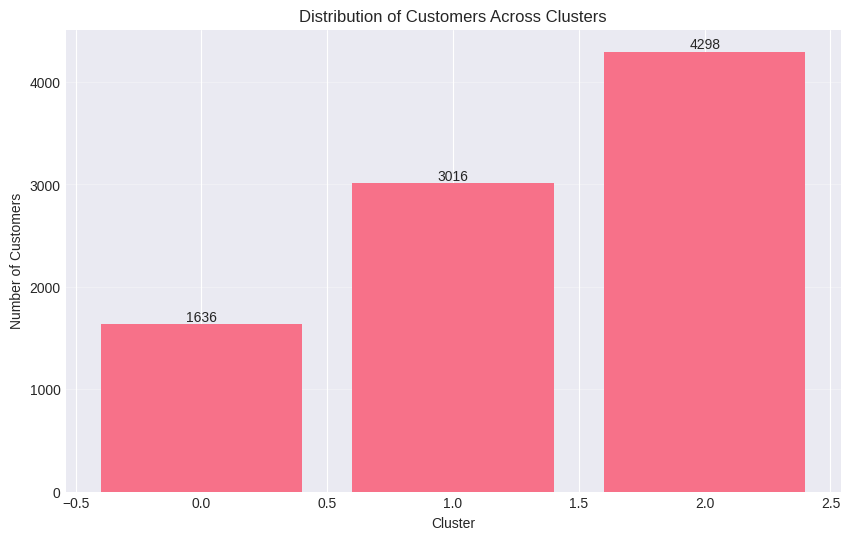

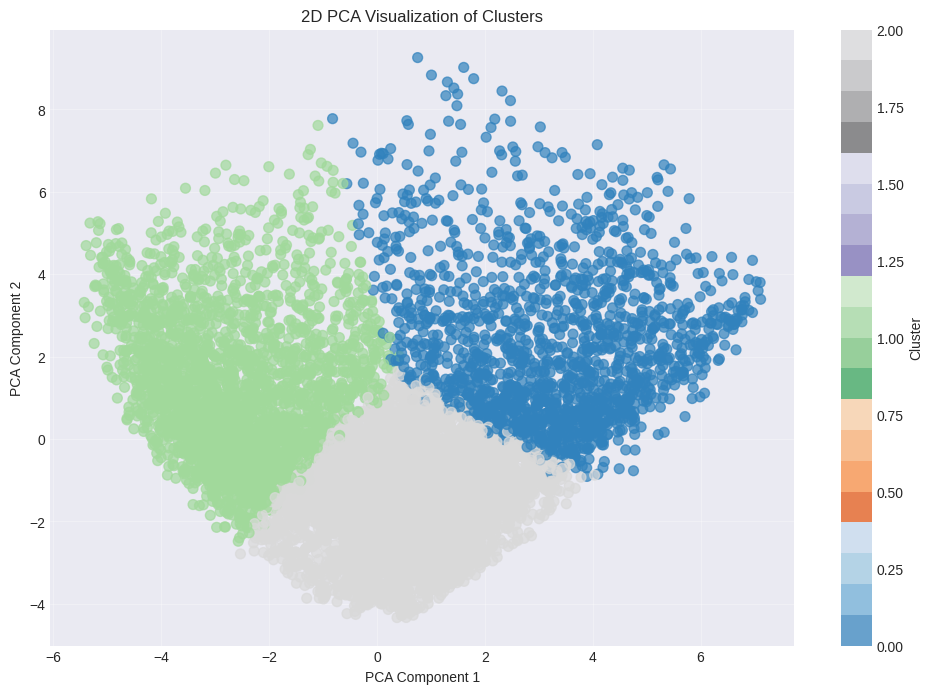

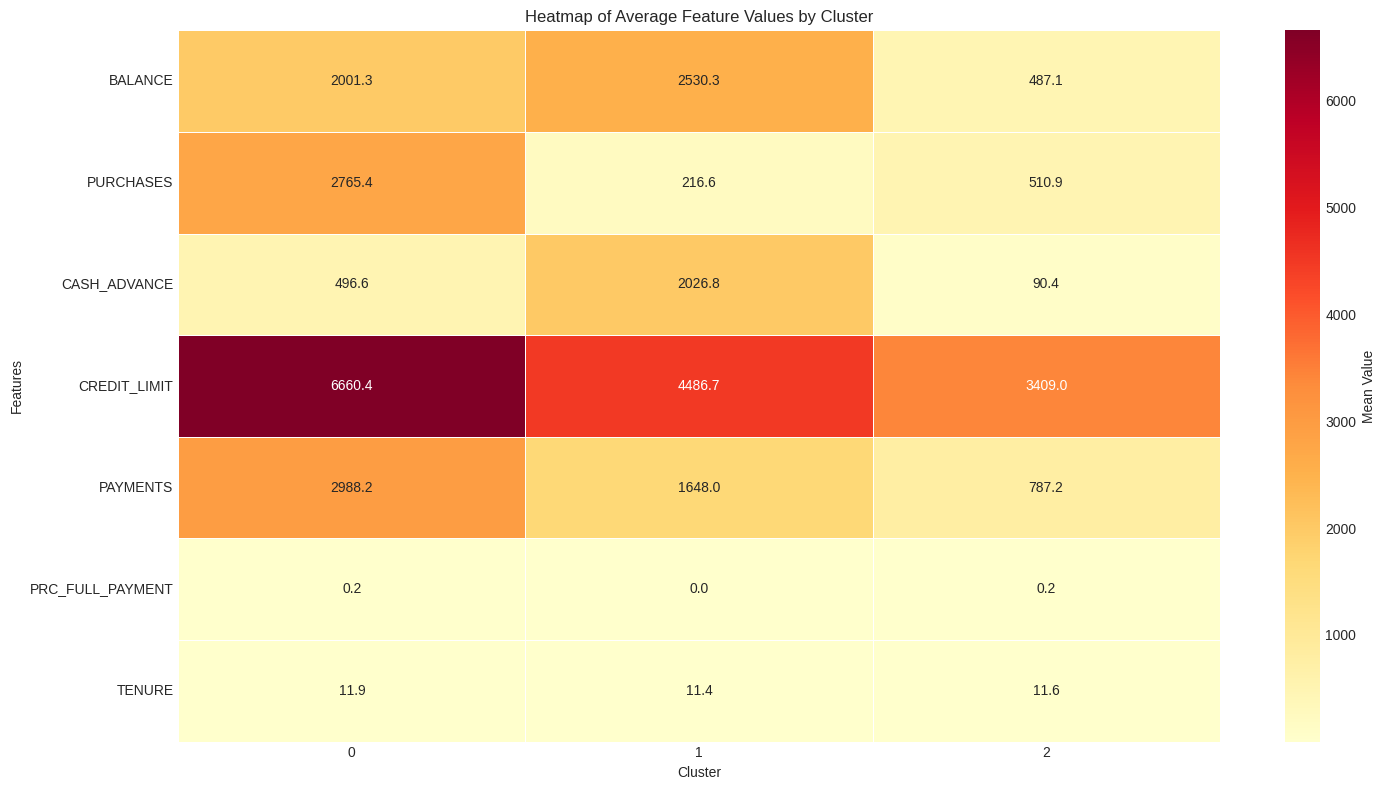

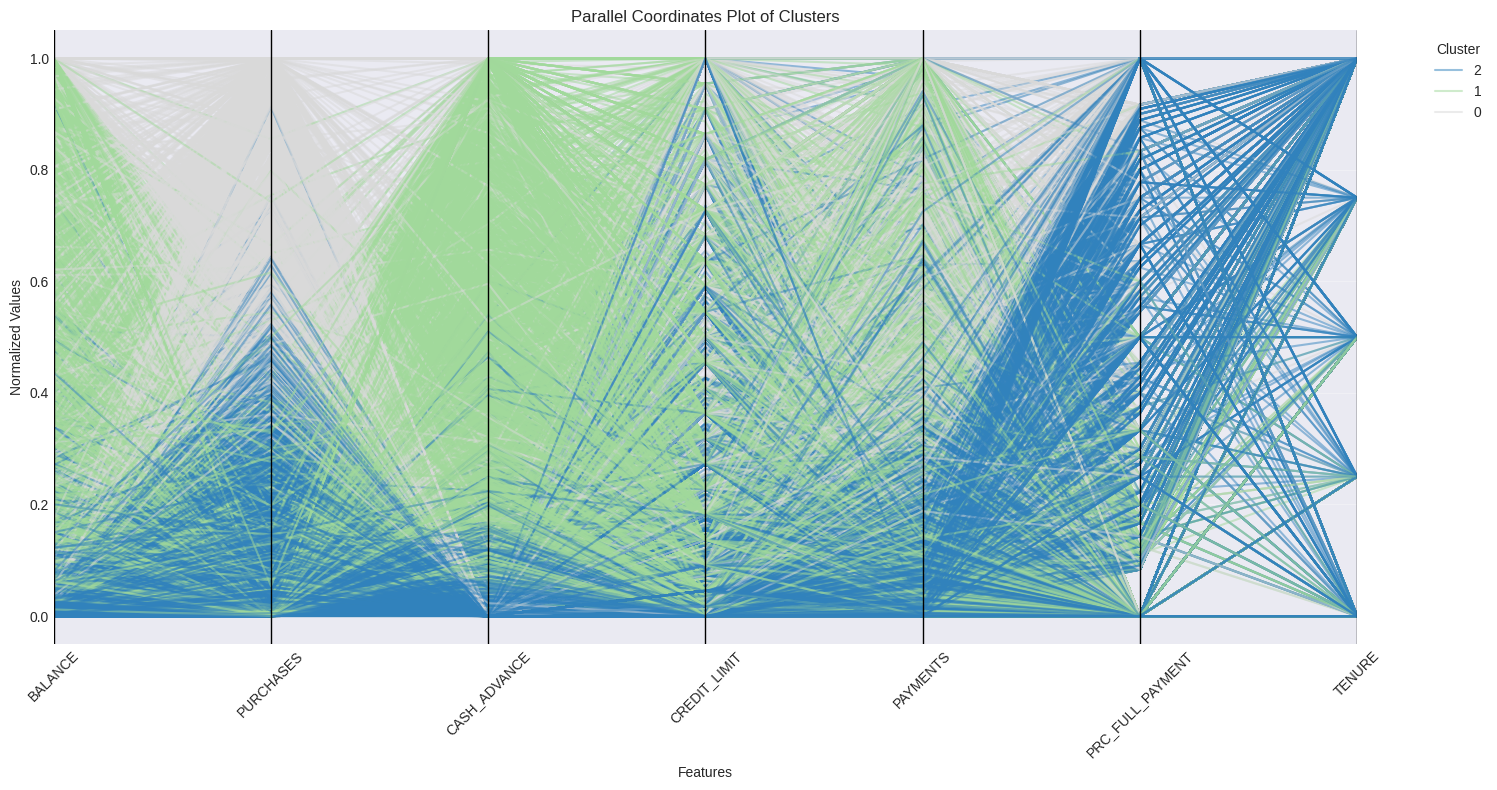

In [ ]:
# ==================== 11. VISUALIZATION ====================
print("\n" + "=" * 60)
print("11. VISUALIZING CLUSTERS")
print("=" * 60)

# 1. Cluster Distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(cluster_sizes.index, cluster_sizes.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers Across Clusters')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')
plt.grid(axis='y', alpha=0.3)
plt.savefig('cluster_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. 2D PCA Visualization
pca_2d = PCA(n_components=2)
pca_2d_result = pca_2d.fit_transform(df_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_2d_result[:, 0], pca_2d_result[:, 1],
                     c=df_analysis['Cluster'], cmap='tab20c', alpha=0.7, s=50)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA Visualization of Clusters')
plt.grid(True, alpha=0.3)
plt.savefig('pca_2d_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Heatmap of Cluster Characteristics
plt.figure(figsize=(15, 8))
cluster_heatmap_data = df_analysis.groupby('Cluster')[key_features].mean()
sns.heatmap(cluster_heatmap_data.T, annot=True, fmt='.1f', cmap='YlOrRd',
            linewidths=0.5, cbar_kws={'label': 'Mean Value'})
plt.title('Heatmap of Average Feature Values by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('cluster_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Parallel Coordinates Plot (for key features)
from pandas.plotting import parallel_coordinates

# Normalize features for parallel coordinates
parallel_data = df_analysis[['Cluster'] + key_features].copy()
for col in key_features:
    parallel_data[col] = (parallel_data[col] - parallel_data[col].min()) / \
                         (parallel_data[col].max() - parallel_data[col].min() + 1e-10)

plt.figure(figsize=(15, 8))
parallel_coordinates(parallel_data, 'Cluster', colormap='tab20c', alpha=0.5)
plt.title('Parallel Coordinates Plot of Clusters')
plt.xlabel('Features')
plt.ylabel('Normalized Values')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('parallel_coordinates.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# ==================== 12. INTERPRET CLUSTERS ====================
print("\n" + "=" * 60)
print("12. CLUSTER INTERPRETATION")
print("=" * 60)

# Define cluster profiles based on feature means
cluster_profiles = {}

for cluster in sorted(df_analysis['Cluster'].unique()):
    cluster_data = df_analysis[df_analysis['Cluster'] == cluster]

    # Calculate key metrics
    avg_balance = cluster_data['BALANCE'].mean()
    avg_purchases = cluster_data['PURCHASES'].mean()
    avg_cash_advance = cluster_data['CASH_ADVANCE'].mean()
    avg_credit_limit = cluster_data['CREDIT_LIMIT'].mean()
    avg_full_payment = cluster_data['PRC_FULL_PAYMENT'].mean()

    # Determine cluster characteristics
    characteristics = []

    if avg_balance > df_analysis['BALANCE'].median():
        characteristics.append("High Balance")
    else:
        characteristics.append("Low Balance")

    if avg_purchases > df_analysis['PURCHASES'].median():
        characteristics.append("High Spender")
    else:
        characteristics.append("Low Spender")

    if avg_cash_advance > df_analysis['CASH_ADVANCE'].median():
        characteristics.append("Frequent Cash Advance")

    if avg_full_payment > df_analysis['PRC_FULL_PAYMENT'].median():
        characteristics.append("Good Payment Behavior")
    else:
        characteristics.append("Poor Payment Behavior")

    # Create profile description
    if avg_credit_limit > df_analysis['CREDIT_LIMIT'].median():
        credit_profile = "High Credit Limit"
    else:
        credit_profile = "Low Credit Limit"

    profile_name = f"Cluster {cluster}: " + ", ".join(characteristics[:3])
    profile_desc = f"Customers with {', '.join(characteristics).lower()}. {credit_profile}."

    cluster_profiles[cluster] = {
        'Profile Name': profile_name,
        'Description': profile_desc,
        'Size': len(cluster_data),
        'Percentage': (len(cluster_data) / len(df_analysis)) * 100
    }

    print(f"\n{profile_name}")
    print(f"  Description: {profile_desc}")
    print(f"  Size: {len(cluster_data)} customers ({cluster_profiles[cluster]['Percentage']:.1f}%)")
    print(f"  Key Stats:")
    print(f"    - Average Balance: ${avg_balance:,.0f}")
    print(f"    - Average Purchases: ${avg_purchases:,.0f}")
    print(f"    - Average Credit Limit: ${avg_credit_limit:,.0f}")
    print(f"    - Full Payment Frequency: {avg_full_payment:.1%}")


12. CLUSTER INTERPRETATION

Cluster 0: High Balance, High Spender, Frequent Cash Advance
  Description: Customers with high balance, high spender, frequent cash advance, good payment behavior. High Credit Limit.
  Size: 1636 customers (18.3%)
  Key Stats:
    - Average Balance: $2,001
    - Average Purchases: $2,765
    - Average Credit Limit: $6,660
    - Full Payment Frequency: 24.5%

Cluster 1: High Balance, Low Spender, Frequent Cash Advance
  Description: Customers with high balance, low spender, frequent cash advance, good payment behavior. High Credit Limit.
  Size: 3016 customers (33.7%)
  Key Stats:
    - Average Balance: $2,530
    - Average Purchases: $217
    - Average Credit Limit: $4,487
    - Full Payment Frequency: 2.7%

Cluster 2: Low Balance, High Spender, Frequent Cash Advance
  Description: Customers with low balance, high spender, frequent cash advance, good payment behavior. High Credit Limit.
  Size: 4298 customers (48.0%)
  Key Stats:
    - Average Balance: $48

In [ ]:
# ==================== 13. BUSINESS RECOMMENDATIONS ====================
print("\n" + "=" * 60)
print("13. BUSINESS RECOMMENDATIONS")
print("=" * 60)

print("\nBased on the clustering analysis, here are business recommendations:")

for cluster, profile in cluster_profiles.items():
    print(f"\nFor {profile['Profile Name']}:")

    if "High Spender" in profile['Profile Name'] and "Good Payment Behavior" in profile['Description']:
        print("  ✓ Premium customer segment - Offer loyalty rewards, increased credit limits")
        print("  ✓ Target for premium credit card upgrades")

    elif "High Balance" in profile['Profile Name'] and "Poor Payment Behavior" in profile['Description']:
        print("  ✓ High-risk segment - Implement credit limit reviews")
        print("  ✓ Offer payment plan options to reduce outstanding balance")

    elif "Low Spender" in profile['Profile Name']:
        print("  ✓ Inactive/low-usage segment - Send promotional offers to increase engagement")
        print("  ✓ Consider reactivation campaigns")

    elif "Frequent Cash Advance" in profile['Profile Name']:
        print("  ✓ Cash-dependent segment - Educate about lower-cost alternatives")
        print("  ✓ Offer personal loan options with lower interest rates")

print("\n" + "=" * 60)
print("SUMMARY")
print("=" * 60)
print(f"• Dataset: {df.shape[0]} customers, {df.shape[1]} features")
print(f"• Optimal clusters: {optimal_k}")
print(f"• Best algorithm: {best_algo}")
print(f"• Best silhouette score: {evaluation_df.loc[best_algo, 'Silhouette Score']:.3f}")
print(f"• Key segments identified: {len(cluster_profiles)} distinct customer groups")
print(f"• Analysis saved to: multiple PNG files for visualization")


13. BUSINESS RECOMMENDATIONS

Based on the clustering analysis, here are business recommendations:

For Cluster 0: High Balance, High Spender, Frequent Cash Advance:
  ✓ Cash-dependent segment - Educate about lower-cost alternatives
  ✓ Offer personal loan options with lower interest rates

For Cluster 1: High Balance, Low Spender, Frequent Cash Advance:
  ✓ Inactive/low-usage segment - Send promotional offers to increase engagement
  ✓ Consider reactivation campaigns

For Cluster 2: Low Balance, High Spender, Frequent Cash Advance:
  ✓ Cash-dependent segment - Educate about lower-cost alternatives
  ✓ Offer personal loan options with lower interest rates

SUMMARY
• Dataset: 8950 customers, 18 features
• Optimal clusters: 3
• Best algorithm: KMeans
• Best silhouette score: 0.213
• Key segments identified: 3 distinct customer groups
• Analysis saved to: multiple PNG files for visualization


In [ ]:
# ==================== 14. SAVE RESULTS ====================
print("\n" + "=" * 60)
print("14. SAVING RESULTS")
print("=" * 60)

# Save clustered data
output_df = df.copy() if 'CUST_ID' in df.columns else df_analysis.copy()
if 'CUST_ID' in output_df.columns:
    output_df = output_df.drop('CUST_ID', axis=1, errors='ignore')
output_df['Cluster'] = df_analysis['Cluster']

# Add cluster profile names
output_df['Cluster_Profile'] = output_df['Cluster'].map(
    {k: v['Profile Name'] for k, v in cluster_profiles.items()}
)

# Save to CSV
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_filename = f'customer_clusters_{timestamp}.csv'
output_df.to_csv(output_filename, index=False)

print(f"✓ Clustered data saved to: {output_filename}")

# Save cluster profiles
profiles_df = pd.DataFrame.from_dict(cluster_profiles, orient='index')
profiles_filename = f'cluster_profiles_{timestamp}.csv'
profiles_df.to_csv(profiles_filename)

print(f"✓ Cluster profiles saved to: {profiles_filename}")

# Save evaluation metrics
eval_filename = f'clustering_evaluation_{timestamp}.csv'
evaluation_df.to_csv(eval_filename)

print(f"✓ Evaluation metrics saved to: {eval_filename}")

print("\n" + "=" * 60)
print("PIPELINE EXECUTION COMPLETE!")
print("=" * 60)


14. SAVING RESULTS
✓ Clustered data saved to: customer_clusters_20251202_211525.csv
✓ Cluster profiles saved to: cluster_profiles_20251202_211525.csv
✓ Evaluation metrics saved to: clustering_evaluation_20251202_211525.csv

PIPELINE EXECUTION COMPLETE!
